In [240]:
import statsmodels.iolib.summary2

SAMPLE_LENGTH = 16
PREDICT_LENGTH = 8

https://blog.csdn.net/weixin_39653948/article/details/105385622

In [241]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Flatten, Bidirectional
from tensorflow.keras.layers import TimeDistributed, RepeatVector
import pandas as pd
import time
import os
import pickle
from datetime import datetime

### 數據處理
* 切割出 train_seq 與對應之 train_seq_label_seq，以及 test_seq


#### 測試數據

In [242]:
pop_index = 6

target_folder_path = 'data/event/Siou_Luan'
list_of_all_file = os.listdir(target_folder_path)

print(list_of_all_file)
test_seq_path = list_of_all_file.pop(pop_index)
print(list_of_all_file)

['秀巒_event10_201005.csv', '秀巒_event1_201002_多峰.csv', '秀巒_event2_201009.csv', '秀巒_event3_200809.csv', '秀巒_event4_200910.csv', '秀巒_event5_201206.csv', '秀巒_event6_201308.csv', '秀巒_event7_201407.csv', '秀巒_event8_201507.csv', '秀巒_event9_200803.csv']
['秀巒_event10_201005.csv', '秀巒_event1_201002_多峰.csv', '秀巒_event2_201009.csv', '秀巒_event3_200809.csv', '秀巒_event4_200910.csv', '秀巒_event5_201206.csv', '秀巒_event7_201407.csv', '秀巒_event8_201507.csv', '秀巒_event9_200803.csv']


In [243]:
print(len(list_of_all_file))


9


### 將 train_data 切成 train_seq 與對應 label

In [244]:
from sklearn.preprocessing import MinMaxScaler

In [245]:
training_data_directory_path = 'data/event/Bai_Shih/July_October_s72_p_m3'
list_of_all_folder = os.listdir(training_data_directory_path)
print(list_of_all_folder)
list_of_all_folder.remove('2013')
list_of_all_folder

['2008', '2009', '2010', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


['2008',
 '2009',
 '2010',
 '2012',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

event106.csv


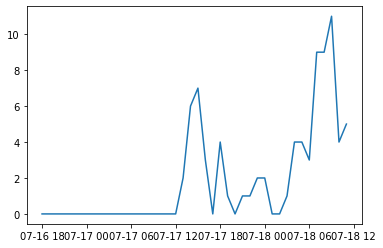

event187.csv


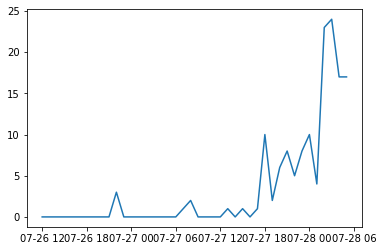

event265.csv


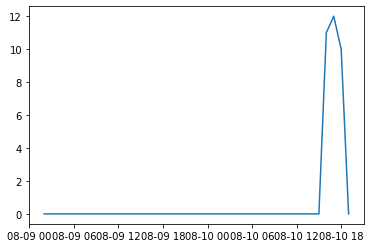

event32.csv


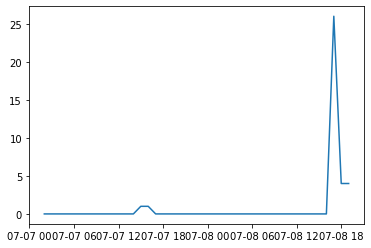

event335.csv


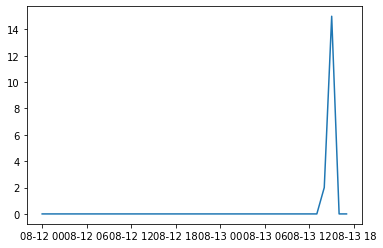

event624.csv


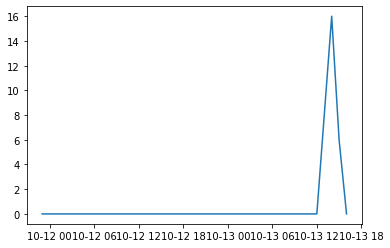

event250.csv


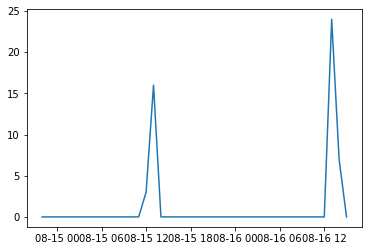

event32.csv


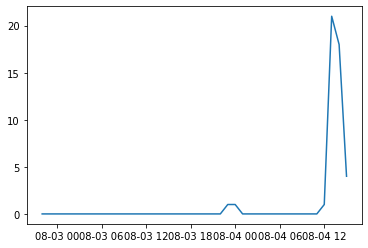

event322.csv


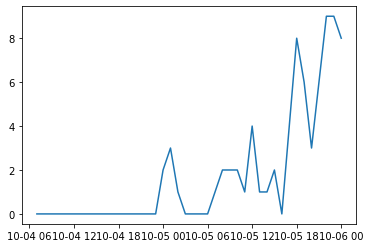

event84.csv


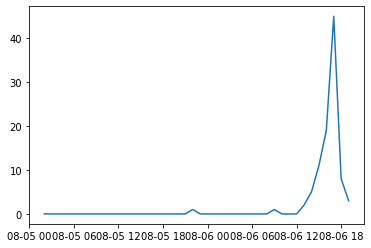

event129.csv


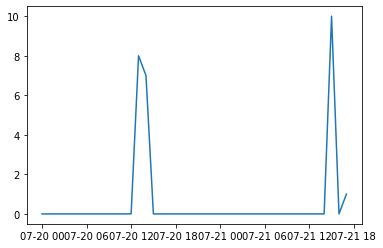

event202.csv


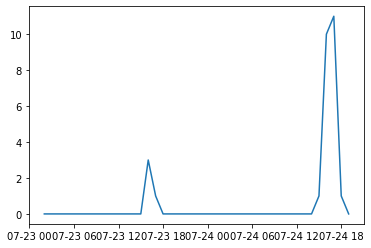

event250.csv


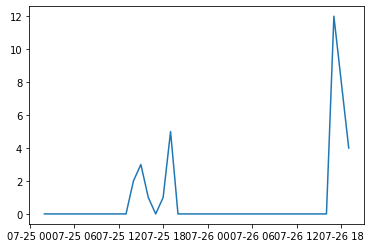

event32.csv


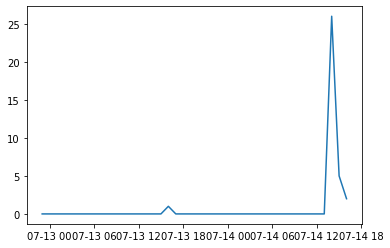

event322.csv


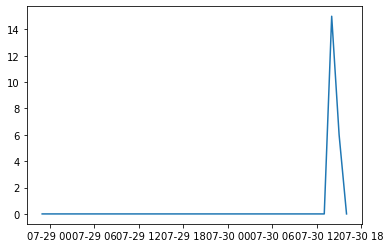

event394.csv


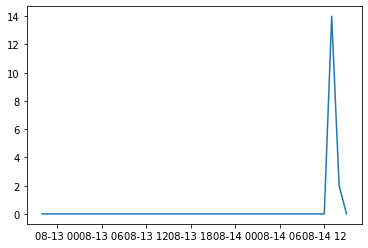

event447.csv


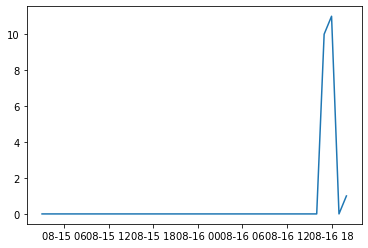

event519.csv


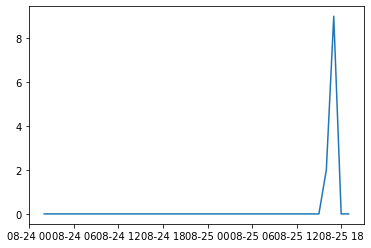

event590.csv


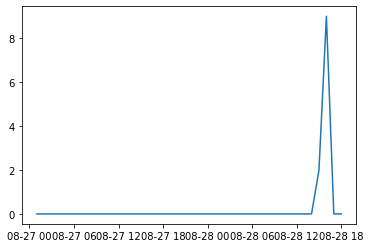

event666.csv


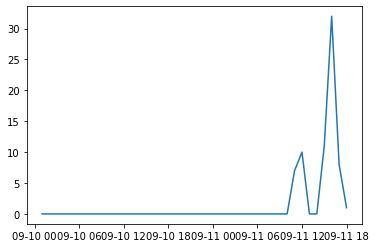

event741.csv


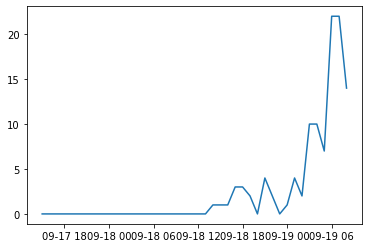

event799.csv


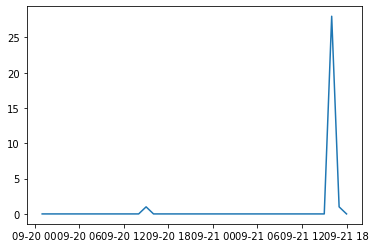

event873.csv


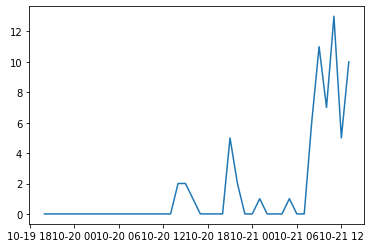

event105.csv


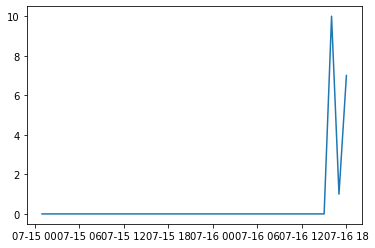

event177.csv


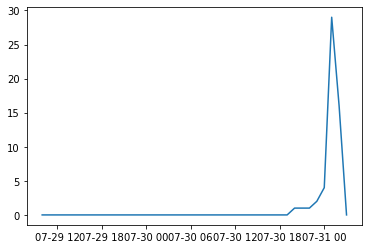

event32.csv


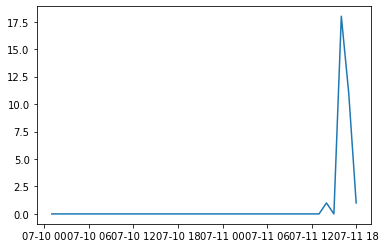

event336.csv


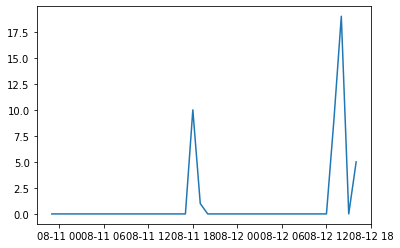

event408.csv


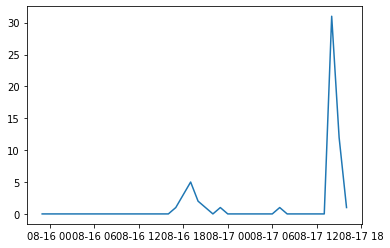

event481.csv


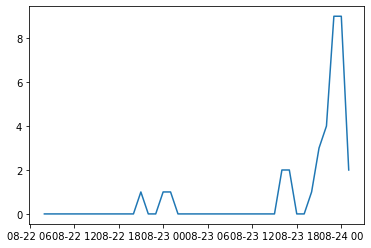

event554.csv


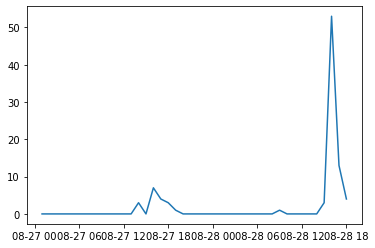

event628.csv


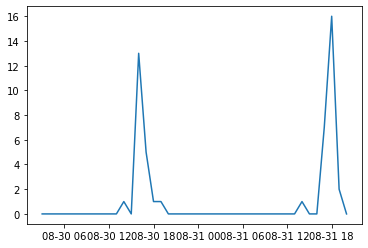

event697.csv


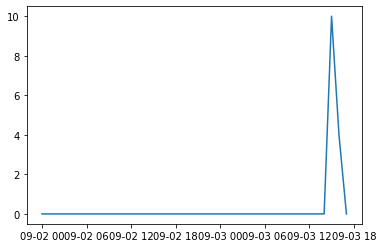

event769.csv


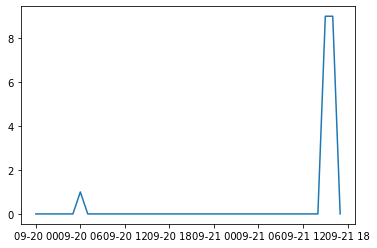

event1006.csv


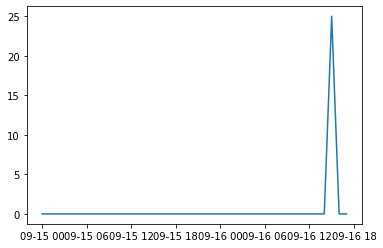

event1087.csv


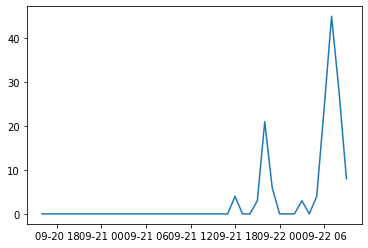

event1144.csv


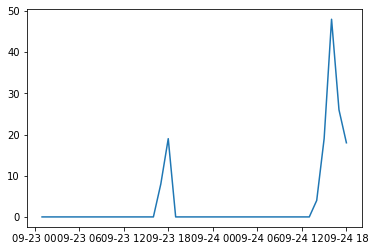

event204.csv


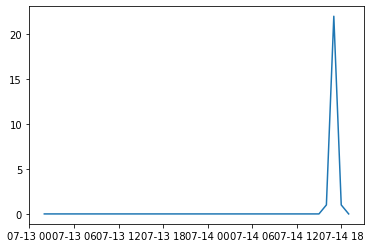

event279.csv


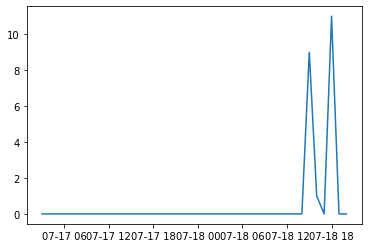

event32.csv


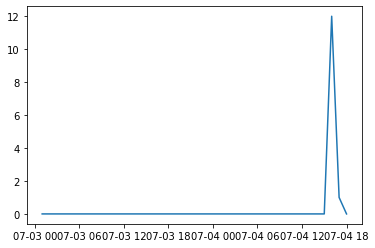

event361.csv


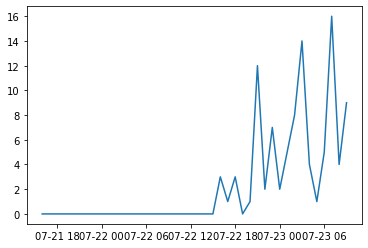

event421.csv


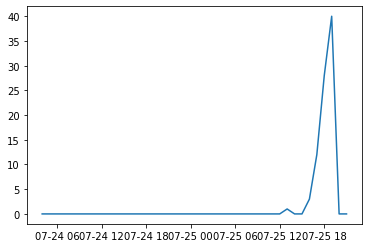

event494.csv


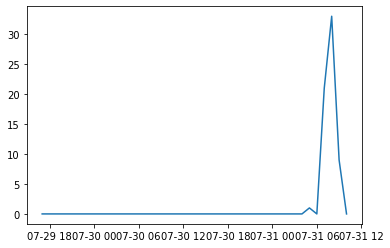

event571.csv


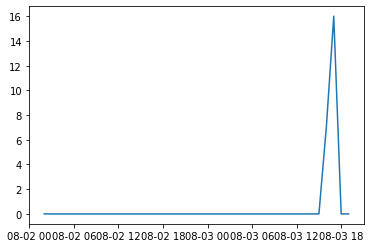

event666.csv


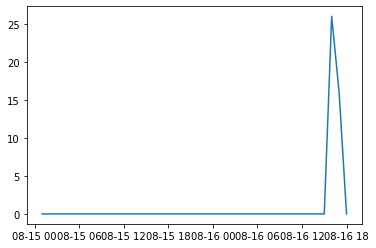

event717.csv


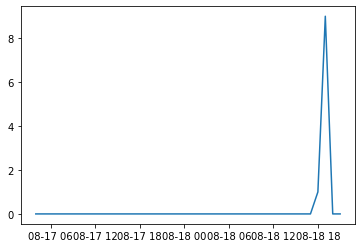

event789.csv


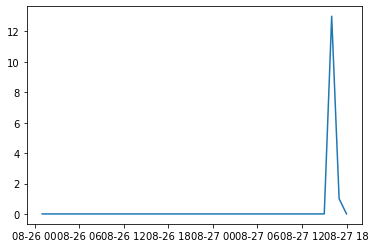

event862.csv


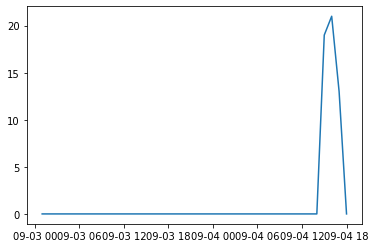

event934.csv


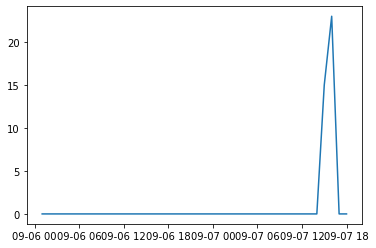

event126.csv


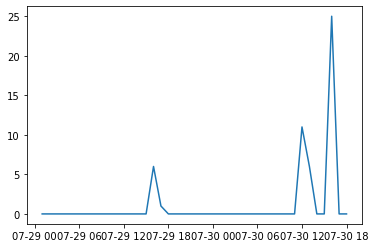

event237.csv


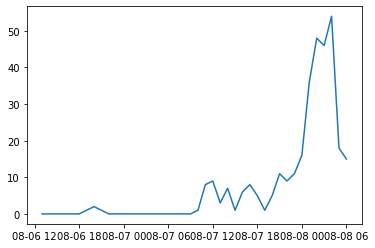

event316.csv


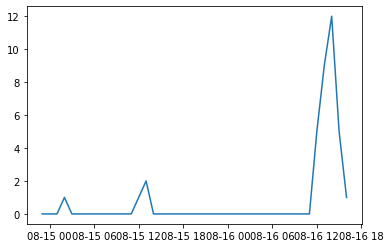

event41.csv


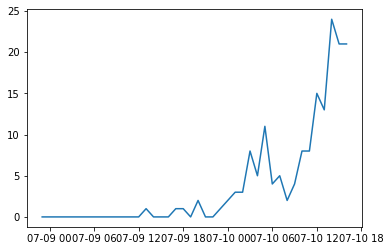

event488.csv


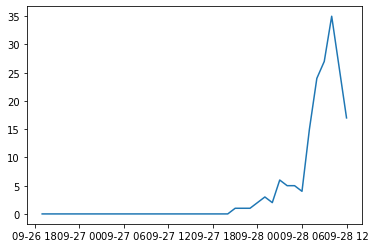

event129.csv


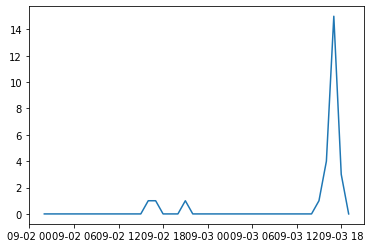

event201.csv


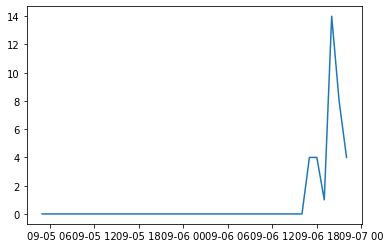

event273.csv


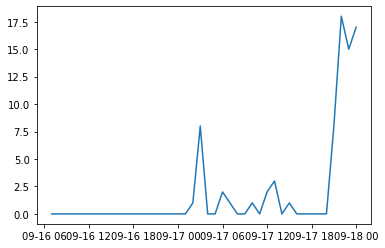

event357.csv


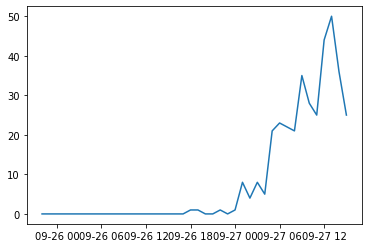

event433.csv


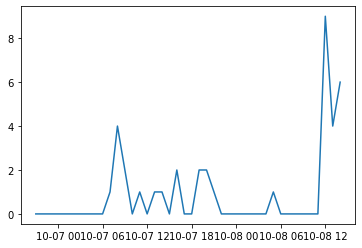

event57.csv


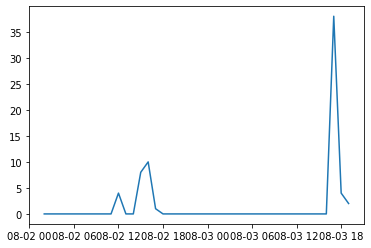

event124.csv


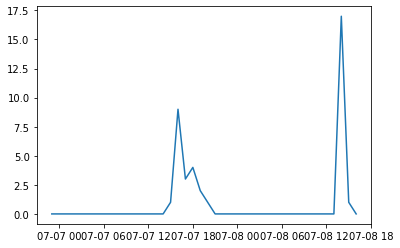

event194.csv


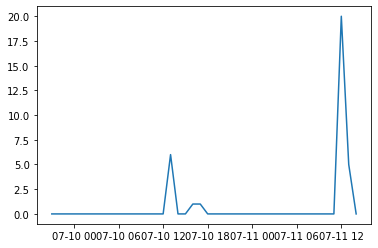

event268.csv


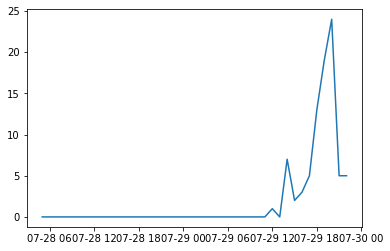

event340.csv


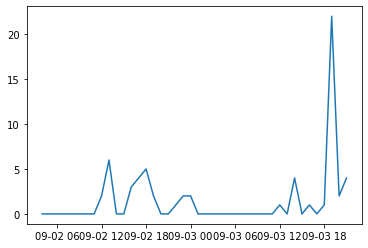

event414.csv


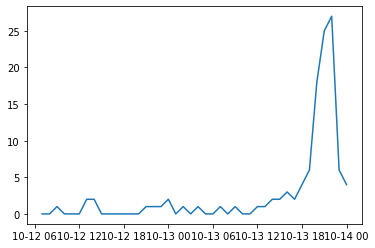

event51.csv


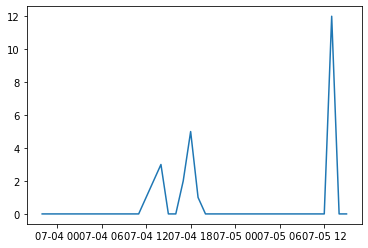

event105.csv


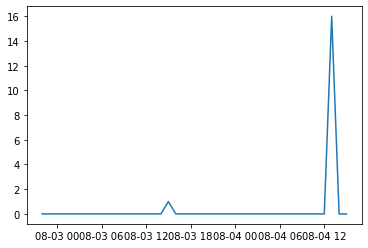

event177.csv


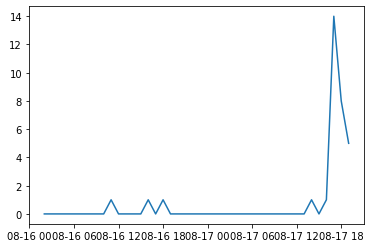

event246.csv


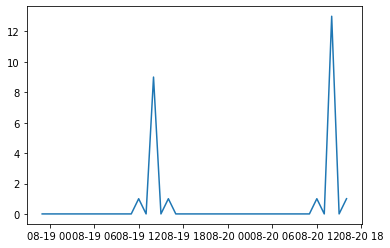

event33.csv


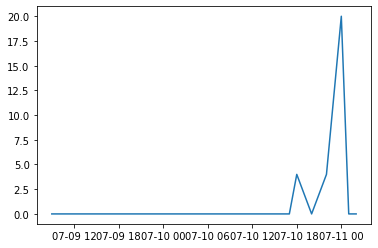

event507.csv


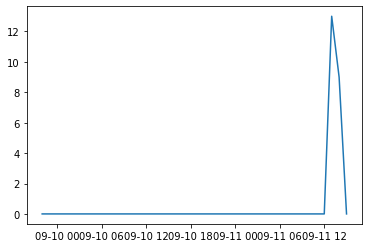

event1.csv


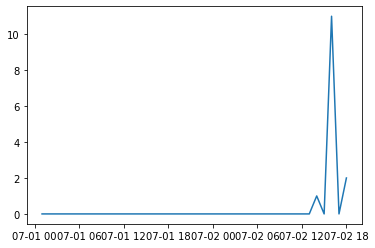

event149.csv


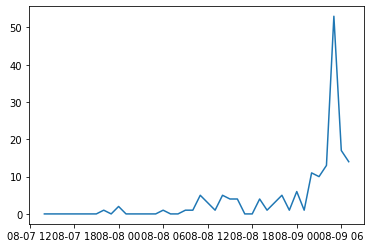

event242.csv


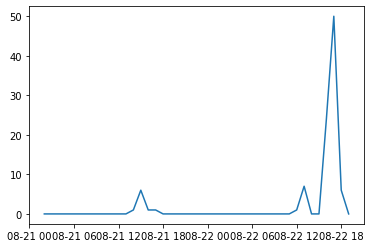

event314.csv


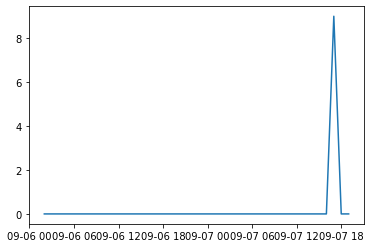

event387.csv


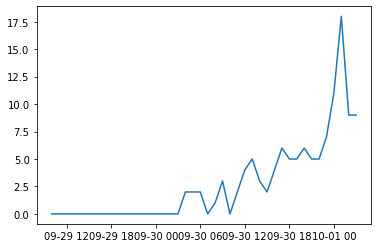

event74.csv


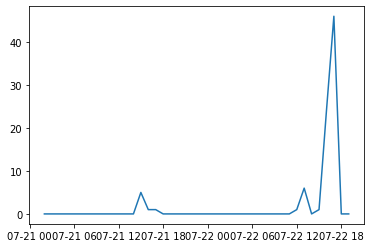

In [246]:
sample_length = SAMPLE_LENGTH
predict_length = PREDICT_LENGTH

train_seq = []
train_seq_label_seq = []

for folder in range(len(list_of_all_folder)):
    folder_path = os.path.join(training_data_directory_path, list_of_all_folder[folder])
    list_of_all_file = os.listdir(folder_path)
    for file_index in range(len(list_of_all_file)):
        print(list_of_all_file[file_index])
        target_df = pd.read_csv(os.path.join(folder_path, list_of_all_file[file_index]))
        target_df['Time'] = pd.to_datetime(target_df['Time'])

        training_data_length = len(target_df['Rainfall'])
        '''將降雨量/流量 標準化'''
        df_dimension = int(target_df.shape[0])
        Y = target_df[['Rainfall']][:int(training_data_length/2+3+3)]
        # scaler = MinMaxScaler(feature_range=(0, 1)).fit(Y)
        # Y = scaler.transform(Y)

        # Z = target_df[['Flow']]
        # # scaler = MinMaxScaler(feature_range=(0, 1)).fit(Z)
        # # Z = scaler.transform(Z)

        X = target_df[['Time']][:int(training_data_length/2+3+3)]

        if int(np.sum(Y)) != 0:
            plt.plot(X, Y)
            # plt.plot(X, Z)
            plt.show()

            '''將該事件轉換為 training sequence 與對應 label pair'''
            for i in range(len(Y)):
                if i+sample_length+predict_length < len(Y)+1:
                    train_seq.append(Y[i:i+sample_length])
                    train_seq_label_seq.append(Y[i+sample_length:i+sample_length+predict_length])

#### 決定 test sequence

秀巒_event6_201308.csv


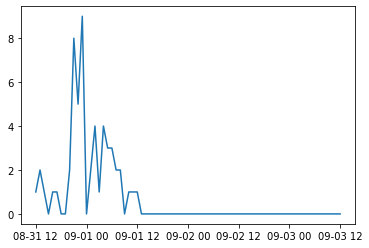

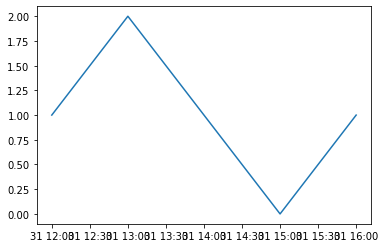

test sequence: 
   rain_白石
0      1.0
1      2.0
2      1.0
3      0.0
4      1.0
absolute rainfall: 
    rain_白石
5       1.0
6       0.0
7       0.0
8       2.0
9       8.0
10      5.0
11      9.0
12      0.0
absolute flow: 
     Flow
5   45.42
6   46.89
7   46.89
8   49.95
9   53.18
10  60.18
11  60.18
12  99.61
test sequence: 
0    1.0
1    2.0
2    1.0
3    0.0
4    1.0
Name: rain_白石, dtype: float64
absolute rainfall: 
[1. 0. 0. 2. 8. 5. 9. 0.]
absolute flow: 
[45.42 46.89 46.89 49.95 53.18 60.18 60.18 99.61]


In [247]:
test_seq_start_index = 5
print(test_seq_path)
test_data_df = pd.read_csv('data/event/Siou_Luan/'+str(test_seq_path))
test_data_df['Time'] = pd.to_datetime(test_data_df['Time'])

Z = test_data_df[['Flow']]
Y = test_data_df[['rain_白石']]
X = test_data_df[['Time']]

'''標準化'''
# scaler = MinMaxScaler(feature_range=(0, 1)).fit(Y)
# Y = scaler.transform(Y)
#
# scaler = MinMaxScaler(feature_range=(0, 1)).fit(Z)
# Z = scaler.transform(Z)

plt.plot(X, Y)
plt.show()

Z_plot = Z[:test_seq_start_index]
Y_plot = Y[:test_seq_start_index]
X_plot = X[:test_seq_start_index]
plt.plot(X_plot, Y_plot)
plt.show()

test_seq = Y_plot[-sample_length:]

print(f'test sequence: \n{test_seq}')
print(f'absolute rainfall: \n{Y[test_seq_start_index:test_seq_start_index+predict_length]}')
print(f'absolute flow: \n{Z[test_seq_start_index:test_seq_start_index+predict_length]}')
print(f'test sequence: \n{np.squeeze(test_seq)}')
absolute_rainfall = np.squeeze(np.array(Y[test_seq_start_index:test_seq_start_index+predict_length]))
absolute_flow = np.squeeze(np.array(Z[test_seq_start_index:test_seq_start_index+predict_length]))
print(f'absolute rainfall: \n{absolute_rainfall}')
print(f'absolute flow: \n{absolute_flow}')


In [248]:
sliding_window_width = len(train_seq[0])
n_features = 1

train_seq = np.array(train_seq)
train_seq_label_seq = np.array(train_seq_label_seq)
test_seq = np.squeeze(np.array(test_seq))

'''補足test_seq維度'''
if len(test_seq) < sample_length:
    test_seq = np.pad(test_seq,(sample_length-len(test_seq),0),'constant',constant_values=0)

train_seq = train_seq.reshape((train_seq.shape[0], train_seq.shape[1], n_features))
train_seq_label_seq = train_seq_label_seq.reshape((train_seq_label_seq.shape[0], train_seq_label_seq.shape[1]))
test_seq = test_seq.reshape((1, test_seq.shape[0], n_features))

In [249]:
print(f'shape of train sequence :{train_seq.shape}')
print(f'shape of train sequence label:{train_seq_label_seq.shape}')
print(f'shape of test sequence:{test_seq.shape}')

shape of train sequence :(1444, 16, 1)
shape of train sequence label:(1444, 8)
shape of test sequence:(1, 16, 1)


In [250]:
def timer(start,end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    time_spent = "{:0>2}h:{:0>2}m:{:05.2f}s".format(int(hours),int(minutes),seconds)
    print(time_spent)
    return time_spent

In [260]:
ACTIVATION_LIST = ['relu']
# LSTM_LAYER_INPUT_SIZE = 100
LSTM_LAYER_INPUT_SIZE_LIST = [128, 256]
# EPOCH_LIST = [1000]
EPOCH = 2000
BATCH_SIZE_LIST = [512]
verbose_set = 2

for ACTIVATION in ACTIVATION_LIST:
    for LSTM_LAYER_INPUT_SIZE in LSTM_LAYER_INPUT_SIZE_LIST:
        for BATCH_SIZE in BATCH_SIZE_LIST:
            class MultiStepModels:
                '''
                多時間步 預測 時間序列 LSTM 模型
                '''

                def __init__(self, train_seq, train_seq_label_seq, test_seq,
                             sw_width, pred_length,
                             features, epochs_num, verbose_set,
                             training_log_folder_path,
                             list_of_all_file,
                             test_seq_start_index,
                             test_seq_path,
                             absolute_rainfall,
                             absolute_flow,
                             flag = 0):
                    self.train_seq = train_seq
                    self.train_seq_label_seq = train_seq_label_seq
                    self.test_seq = test_seq
                    self.sw_width = sw_width
                    self.pred_length = pred_length

                    self.features = features
                    self.epochs_num = epochs_num

                    # verbose = 0 为不在标准输出流输出日志信息
                    # verbose = 1 为输出进度条记录
                    # verbose = 2 为每个epoch输出一行记录
                    self.verbose_set = verbose_set

                    self.flag = flag
                    self.training_log_folder_path = training_log_folder_path
                    self.list_of_all_file = list_of_all_file
                    self.test_seq_path = test_seq_path
                    self.test_seq_start_index = test_seq_start_index
                    self.absolute_rainfall = absolute_rainfall
                    self.absolute_flow = absolute_flow

                def stacked_LSTM(self):
                    start_time = time.time()

                    print(f'train_seq.shape: {self.train_seq.shape}')
                    print(f'train_seq_label_seq.shape: {self.train_seq_label_seq.shape}')
                    print(f'test_seq.shape: {self.test_seq.shape}')
                    model = Sequential()
                    model.add(LSTM(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION, return_sequences=True,
                                   input_shape = (self.sw_width, self.features)))
                    model.add(LSTM(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION, return_sequences=True,
                                   input_shape = (self.sw_width, self.features)))
                    model.add(LSTM(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION))
                    model.add(Dense(units=self.pred_length))
                    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
                    print(model.summary())

                    stacked_lstm_history = model.fit(self.train_seq,
                                                     self.train_seq_label_seq,
                                                     epochs=self.epochs_num,
                                                     verbose=self.verbose_set,
                                                     batch_size=BATCH_SIZE,
                                                     workers=16,
                                                     use_multiprocessing=True)
                    model.save(os.path.join(training_log_folder_path,'stacked_LSTM_model.h5'))
                    end_time = time.time()
                    time_spent = timer(start_time, end_time)
                    print(f'訓練費時：'+time_spent)
                    print('\ntrain_acc:%s'%np.mean(stacked_lstm_history.history['accuracy']),
                          '\ntrain_loss:%s'%np.mean(stacked_lstm_history.history['loss']))
                    # print('y^hat:%s'%(model.predict(self.test_seq)),'\n-----------------------------')

                    '''保存訓練結果'''
                    hist_df = pd.DataFrame(stacked_lstm_history.history)
                    with open(os.path.join(training_log_folder_path,'stacked_LSTM.txt'),'a',encoding='utf-8') as file:
                        file.write(f'訓練時間：'+time_spent+'\n')
                        file.write(f'訓練資料集：\n{list_of_all_file}\n')
                        file.write(f'測試資料路徑：{test_seq_path}\n')
                        file.write(f'測試資料開始預測位置：{test_seq_start_index}\n')
                        file.write(f'降雨量預測結果：{np.squeeze(model.predict(self.test_seq))}\n')
                        file.write(f'真實降雨量：{absolute_rainfall}\n')
                        file.write(f'真實流量：{absolute_flow}\n')
                        file.write(f"\n下為模型資訊：\n")
                        file.write(f'epoch數目：{epoch_num}\n')
                        file.write(f'LSTM input size：{LSTM_LAYER_INPUT_SIZE}\n')
                        file.write(f'Activation function: '+ACTIVATION+'\n')
                        file.write(f'Batch size: {BATCH_SIZE}\n')
                        model.summary(print_fn=lambda  x: file.write(x + '\n'))
                        file.write("\n下為 loss 與 accuracy\n")
                        hist_df.to_string(file)
                    '''保存訓練結果'''

                    '''二進制的保存方法'''
                    # with open('training_log.txt','wb') as file:
                    #     pickle.dump(stacked_lstm_history.history, file)
                    '''二進制的保存方法'''

                    '''繪製 loss 隨 epoch 增加之表現'''
                    fig = plt.figure()
                    plt.plot(stacked_lstm_history.history['loss'])
                    plt.title('Model Accuracy', fontsize=13)
                    plt.ylabel('loss', fontsize=12)
                    plt.xlabel('epoch', fontsize=12)
                    plt.grid(True)
                    plt.legend()
                    plt.show()
                    fig.savefig(os.path.join(training_log_folder_path, 'stacked_LSTM_model_loss.png'))
                    '''繪製 loss 隨 epoch 增加之表現'''

                    '''繪製 accuracy 隨 epoch 增加之表現'''
                    fig = plt.figure()
                    plt.plot(stacked_lstm_history.history['accuracy'], 'orange')
                    plt.title('Model Accuracy', fontsize=13)
                    plt.ylabel('accuracy', fontsize=12)
                    plt.xlabel('epoch', fontsize=12)
                    plt.ylim((0,1))
                    plt.grid(True)
                    plt.legend()
                    plt.show()
                    fig.savefig(os.path.join(training_log_folder_path, 'stacked_LSTM_model_accuracy.png'))
                    '''繪製 accuracy 隨 epoch 增加之表現'''

                    return np.squeeze(model.predict(self.test_seq))

                def encoder_decoder_lstm(self):
                    start_time = time.time()
                    print(f'train_seq.shape: {self.train_seq.shape}')
                    print(f'train_seq_label_seq.shape: {self.train_seq_label_seq.shape}')
                    print(f'test_seq.shape: {self.test_seq.shape}')
                    model = Sequential()
                    model.add(LSTM(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION,
                                   input_shape = (self.sw_width, self.features)))
                    model.add(RepeatVector(self.pred_length))

                    model.add(LSTM(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION, return_sequences=True))
                    model.add(TimeDistributed(Dense(1)))

                    '''版本二
                    model = Sequential()
                    model.add(LSTM(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION,
                                   input_shape = (self.sw_width, self.features)))
                    model.add(RepeatVector(self.pred_length))

                    model.add(LSTM(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION, return_sequences=True))

                    model.add(LSTM(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION))
                    model.add(Dense(units=self.pred_length))
                    '''

                    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
                    print(model.summary())

                    ed_lstm_history = model.fit(self.train_seq,
                                                self.train_seq_label_seq,
                                                epochs=self.epochs_num,
                                                verbose=self.verbose_set,
                                                batch_size=BATCH_SIZE,
                                                workers=16,
                                                use_multiprocessing=True)
                    model.save(os.path.join(training_log_folder_path,'encoder_decoder_LSTM_model.h5'))
                    end_time = time.time()
                    time_spent = timer(start_time, end_time)
                    print(f'訓練費時：'+time_spent)
                    print('\ntrain_acc:%s'%np.mean(ed_lstm_history.history['accuracy']),
                          '\ntrain_loss:%s'%np.mean(ed_lstm_history.history['loss']))
                    # print('y^hat:%s'%(model.predict(self.test_seq)),'\n-----------------------------')

                    '''保存訓練結果'''
                    hist_df = pd.DataFrame(ed_lstm_history.history)
                    with open(os.path.join(training_log_folder_path,'encoder_decoder_lstm.txt'),'a',encoding='utf-8') as file:
                        file.write(f'訓練時間：'+time_spent+'\n')
                        file.write(f'訓練資料集：\n{list_of_all_file}\n')
                        file.write(f'測試資料路徑：{test_seq_path}\n')
                        file.write(f'測試資料開始預測位置：{test_seq_start_index}\n')
                        file.write(f'降雨量預測結果：{np.squeeze(model.predict(self.test_seq))}\n')
                        file.write(f'真實降雨量：{absolute_rainfall}\n')
                        file.write(f'真實流量：{absolute_flow}\n')
                        file.write(f"\n下為模型資訊：\n")
                        file.write(f'epoch數目：{epoch_num}\n')
                        file.write(f'LSTM input size：{LSTM_LAYER_INPUT_SIZE}\n')
                        file.write(f'Activation function: '+ACTIVATION+'\n')
                        file.write(f'Batch size: {BATCH_SIZE}\n')
                        model.summary(print_fn=lambda  x: file.write(x + '\n'))
                        file.write("\n下為 loss 與 accuracy\n")
                        hist_df.to_string(file)
                    '''保存訓練結果'''

                    '''繪製 loss 隨 epoch 增加之表現'''
                    fig = plt.figure()
                    plt.plot(ed_lstm_history.history['loss'])
                    plt.title('Model Accuracy', fontsize=13)
                    plt.ylabel('loss', fontsize=12)
                    plt.xlabel('epoch', fontsize=12)
                    plt.grid(True)
                    plt.legend()
                    plt.show()
                    fig.savefig(os.path.join(training_log_folder_path, 'encoder_decoder_lstm_model_loss.png'))
                    '''繪製 loss 隨 epoch 增加之表現'''

                    '''繪製 accuracy 隨 epoch 增加之表現'''
                    fig = plt.figure()
                    plt.plot(ed_lstm_history.history['accuracy'], 'orange')
                    plt.title('Model Accuracy', fontsize=13)
                    plt.ylabel('accuracy', fontsize=12)
                    plt.xlabel('epoch', fontsize=12)
                    plt.ylim((0,1))
                    plt.grid(True)
                    plt.legend()
                    plt.show()
                    fig.savefig(os.path.join(training_log_folder_path, 'encoder_decoder_lstm_model_accuracy.png'))
                    '''繪製 accuracy 隨 epoch 增加之表現'''

                    return np.squeeze(model.predict(self.test_seq))

            '''#%%'''

            stacked_LSTM_prediction = np.array([])
            ed_lstm_prediction = np.array([])
            if __name__ == '__main__':



                epoch_num = EPOCH

                training_date_time = datetime.now().strftime('%Y-%m-%d'+'_'+'%H'+'h'+'-%M'+'m'+'-%S'+'s')
                training_log_folder_path = 'model_training_log\\'+training_date_time
                folder_path = os.path.exists('model_training_log')
                if not folder_path:
                    os.makedirs('model_training_log')
                else:
                    print(f'{folder_path}, 該目錄已存在')
                os.mkdir(training_log_folder_path)

                ''' Stacked LSTM'''
                print('-------以下為【Stacked LSTM 模型 】相關訊息-------')
                MultiStepLSTM = MultiStepModels(train_seq, train_seq_label_seq, test_seq,
                                                sliding_window_width, predict_length,
                                                n_features, epoch_num, verbose_set,
                                                training_log_folder_path=training_log_folder_path,
                                                list_of_all_file=list_of_all_file,
                                                test_seq_path=test_seq_path,
                                                test_seq_start_index=test_seq_start_index,
                                                absolute_rainfall=absolute_rainfall,
                                                absolute_flow=absolute_flow)
                stacked_LSTM_prediction = MultiStepLSTM.stacked_LSTM()
                print(f'prediction of stacked_LSTM: {stacked_LSTM_prediction}')

                # ''' Encoder-Decoder LSTM'''
                # print('-------以下為【編碼器-解碼器 LSTM 模型 】相關訊息-------')
                # MultiStepLSTM = MultiStepModels(train_seq, train_seq_label_seq, test_seq,
                #                                 sliding_window_width, predict_length,
                #                                 n_features, epoch_num, verbose_set,
                #                                 training_log_folder_path=training_log_folder_path,
                #                                 list_of_all_file=list_of_all_file,
                #                                 test_seq_path=test_seq_path,
                #                                 test_seq_start_index=test_seq_start_index,
                #                                 absolute_rainfall=absolute_rainfall,
                #                                 absolute_flow=absolute_flow,
                #                                 flag=1)
                # ed_lstm_prediction = MultiStepLSTM.encoder_decoder_lstm()
                # print(f'prediction of encoder-decoder lstm: {ed_lstm_prediction}')

            '''#%%'''
            start_index, end_index = 3, 16
            X_summary = X[start_index:end_index]
            Y_summary = Y[start_index:end_index]
            prediction_X = X[test_seq_start_index:test_seq_start_index+predict_length]
            fig = plt.figure()
            if stacked_LSTM_prediction.size!=0:
                plt.plot(prediction_X, stacked_LSTM_prediction, 'black', label='stacked LSTM')
            if ed_lstm_prediction.size!=0:
                plt.plot(prediction_X, ed_lstm_prediction, 'r', label='encoder-decoder LSTM')
            plt.plot(X_summary, Y_summary, 'c')

            plt.title('Prediction Result on '+ str(test_seq_path), fontsize=14)
            plt.ylabel('rainfall (mm)', fontsize=12)
            plt.xlabel('time step (hour)', fontsize=12)
            # plt.ylim(0,8)
            plt.grid(True)
            plt.legend()
            plt.show()

            '''保存matplotlib繪出的訓練結果'''
            fig.savefig(os.path.join(training_log_folder_path, 'prediction_plot.png'))

True, 該目錄已存在
-------以下為【Stacked LSTM 模型 】相關訊息-------
train_seq.shape: (1444, 16, 1)
train_seq_label_seq.shape: (1444, 8)
test_seq.shape: (1, 16, 1)
Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_208 (LSTM)             (None, 16, 128)           66560     
                                                                 
 lstm_209 (LSTM)             (None, 16, 128)           131584    
                                                                 
 lstm_210 (LSTM)             (None, 128)               131584    
                                                                 
 dense_88 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 330,760
Trainable params: 330,760
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2000
3/3 - 2s - lo

KeyboardInterrupt: 

### 秀巒水位站 流量 雨量站 比例
* 鎮西堡 0.16
* 白石 0.77
* 秀巒 0.07

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())

In [259]:
tets = np.arange(1)
print(tets)
if tets.size==0:
    print('empty')
else:
    print('not empty')



[0]
not empty
